In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split

import optuna
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [67]:
data = pd.read_excel(r"telecom_churn.xlsx")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
2,3668-QPYBK,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
3,7795-CFOCW,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
4,9237-HQITU,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,Yes


In [68]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7795,7795,7795.0000,7795,7795,7709.0000,7795,7795,7795,7795,7599,7795,7795,7795,7795,7795,7795,7795,7795.0000,7784.0000,7795
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,2511-MORQY,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,2,3928,NaN,4077,5500,NaN,7030,3740,3527,4039,3644,3563,4006,3219,3188,4433,4667,2718,NaN,NaN,5625
mean,NaN,NaN,0.1656,NaN,NaN,31.8354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.5702,2239.0917,NaN
std,NaN,NaN,0.3718,NaN,NaN,24.3588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.4178,2240.0047,NaN
min,NaN,NaN,0.0000,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.2500,18.8000,NaN
25%,NaN,NaN,0.0000,NaN,NaN,9.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.4000,384.4375,NaN
50%,NaN,NaN,0.0000,NaN,NaN,28.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.7500,1378.3500,NaN
75%,NaN,NaN,0.0000,NaN,NaN,54.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.8500,3673.6000,NaN


In [69]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [70]:
data.drop(['customerID'], axis=1, inplace=True)

In [71]:
data.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure               86
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup        196
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges         11
Churn                 0
dtype: int64

In [72]:
data["Churn"] = data["Churn"].replace({"Yes": 1, "No": 0})

C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\2578155999.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Churn"] = data["Churn"].replace({"Yes": 1, "No": 0})


In [73]:
data_lr_knn_rf = data.copy()
data_xgb_cb_cbc = data.copy()

In [74]:
for i in data_lr_knn_rf.columns:
    if i in ['tenure']:
        data_lr_knn_rf[i].fillna(0, inplace=True)
    elif data_lr_knn_rf[i].dtype == 'object':
        data_lr_knn_rf[i].fillna(data_lr_knn_rf[i].mode()[0], inplace=True)
    else:
        data_lr_knn_rf[i].fillna(data_lr_knn_rf[i].mean(), inplace=True)

C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\1319155476.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_lr_knn_rf[i].fillna(data_lr_knn_rf[i].mode()[0], inplace=True)
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\1319155476.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [75]:
data_lr_knn_rf.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [76]:
data_lr = data_lr_knn_rf.copy()
data_knn = data_lr_knn_rf.copy()
data_rf = data_lr_knn_rf.copy()

In [77]:
#Logistic Regression 

In [78]:
for var in data_lr.columns:
    if var == 'Churn':
        continue  

    if data_lr[var].dtypes != object:
        
        q1 = data_lr[var].quantile(0.25)
        q2 = data_lr[var].quantile(0.5)
        q3 = data_lr[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data_lr['category_' + var] = pd.cut(data_lr[var], bins=ranges, duplicates='drop')

        grouped = data_lr.groupby(['category_' + var, 'Churn'])['Churn'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data_lr = data_lr.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)

    elif data_lr[var].dtypes == object:

        grouped = data_lr.groupby([var, 'Churn'])['Churn'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data_lr = data_lr.merge(grouped[[var, var + '_woe']], how='left', on=var)
        
data_lr

C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\3515746533.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_lr.groupby(['category_' + var, 'Churn'])['Churn'].count().unstack().reset_index()
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\3515746533.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_lr.groupby(['category_' + var, 'Churn'])['Churn'].count().unstack().reset_index()
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\3515746533.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pa

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_woe,category_SeniorCitizen,SeniorCitizen_woe,Partner_woe,Dependents_woe,category_tenure,tenure_woe,PhoneService_woe,MultipleLines_woe,InternetService_woe,OnlineSecurity_woe,OnlineBackup_woe,DeviceProtection_woe,TechSupport_woe,StreamingTV_woe,StreamingMovies_woe,Contract_woe,PaperlessBilling_woe,PaymentMethod_woe,category_MonthlyCharges,MonthlyCharges_woe,category_TotalCharges,TotalCharges_woe
0,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,0,-0.0173,"(-inf, 0.0]",0.1527,0.3933,-0.2253,"(-inf, 8.0]",-1.0143,0.1479,0.1479,0.4786,-0.6628,0.3407,-0.5526,-0.6558,-0.2982,-0.3074,-0.6999,-0.3264,-0.8139,"(-inf, 43.4]",0.9730,"(-inf, 385.725]",-0.7724
1,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,0,0.0172,"(-inf, 0.0]",0.1527,-0.3064,-0.2253,"(27.0, 54.0]",0.4747,-0.0155,0.0678,0.4786,0.8052,-0.5449,0.2462,-0.6558,-0.2982,-0.3074,1.1031,0.6057,0.4447,"(43.4, 70.75]",0.1150,"(1380.4, 3668.025]",0.2243
2,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,1,0.0172,"(-inf, 0.0]",0.1527,-0.3064,-0.2253,"(-inf, 8.0]",-1.0143,-0.0155,0.0678,0.4786,0.8052,0.3407,-0.5526,-0.6558,-0.2982,-0.3074,-0.6999,-0.3264,0.4447,"(43.4, 70.75]",0.1150,"(-inf, 385.725]",-0.7724
3,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,0,0.0172,"(-inf, 0.0]",0.1527,-0.3064,-0.2253,"(27.0, 54.0]",0.4747,0.1479,0.1479,0.4786,0.8052,-0.5449,0.2462,0.7494,-0.2982,-0.3074,1.1031,0.6057,0.5877,"(-inf, 43.4]",0.9730,"(1380.4, 3668.025]",0.2243
4,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,1,-0.0173,"(-inf, 0.0]",0.1527,-0.3064,-0.2253,"(-inf, 8.0]",-1.0143,-0.0155,0.0678,-0.6838,-0.6628,-0.5449,-0.5526,-0.6558,-0.2982,-0.3074,-0.6999,-0.3264,-0.8139,"(43.4, 70.75]",0.1150,"(-inf, 385.725]",-0.7724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,Female,0,Yes,Yes,72.0000,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.4500,8058.8500,0,-0.0173,"(-inf, 0.0]",0.1527,0.3933,0.6711,"(54.0, inf]",1.4580,-0.0155,-0.1066,-0.6838,0.8052,-0.5449,0.2462,0.7494,-0.1684,-0.1598,2.5487,-0.3264,0.5877,"(89.85, inf]",-0.3053,"(3668.025, inf]",0.8079
7791,Male,1,No,No,15.0000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.2000,1133.9000,1,0.0172,"(0.0, inf]",-0.6607,-0.3064,-0.2253,"(8.0, 27.0]",-0.1642,-0.0155,-0.1066,-0.6838,-0.6628,-0.5449,-0.5526,-0.6558,-0.2982,-0.3074,-0.6999,-0.3264,0.7111,"(70.75, 89.85]",-0.4928,"(385.725, 1380.4]",0.0117
7792,Female,1,No,No,4.0000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.4500,294.4500,0,-0.0173,"(0.0, inf]",-0.6607,-0.3064,-0.2253,"(-inf, 8.0]",-1.0143,-0.0155,-0.1066,-0.6838,-0.6628,-0.5449,-0.5526,-0.6558,-0.2982,-0.3074,-0.6999,-0.3264,-0.8139,"(70.75, 89.85]",-0.4928,"(-inf, 385.725]",-0.7724
7793,Male,1,Yes,No,50.0000,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),105.0500,5163.3000,0,0.0172,"(0.0, inf]",-0.6607,0.3933,-0.2253,"(27.0, 54.0]",0.4747,-0.0155,-0.1066,-0.6838,0.8052,-0.5449,0.2462,-0.6558,-0.1684,-0.1598,2.5487,-0.3264,0.7111,"(89.85, inf]",-0.3053,"(3668.025, inf]",0.8079


In [79]:
def target_correlation(data, target, threshold=0.1):
    
    woe_features = data.filter(regex='_woe$', axis=1) 
    woe_features[target] = data[target] 
    
    corr_matrix = woe_features.corr(method='spearman')
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


target_result = target_correlation(data_lr, 'Churn')

target_result

C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\1877717419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woe_features[target] = data[target]


,Variable,Correlation with Target
0,SeniorCitizen_woe,-0.1483
1,Partner_woe,-0.1530
2,Dependents_woe,-0.1638
3,tenure_woe,-0.3558
4,InternetService_woe,-0.3268
5,OnlineSecurity_woe,-0.3464
6,OnlineBackup_woe,-0.2874
7,DeviceProtection_woe,-0.2796
8,TechSupport_woe,-0.3414
9,StreamingTV_woe,-0.1857


In [80]:
def intercorrelation(data, target, threshold=0.7):
    
    woe_features = data.filter(regex='_woe$', axis=1) 
    
    corr_matrix = woe_features.corr(method='spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
            
   # print(correlated_pairs_set)
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

# Example usage
intercorrelated_result = intercorrelation(data_lr, 'Churn')
intercorrelated_result


,Variable 1,Variable 2
0,InternetService_woe,MonthlyCharges_woe
1,tenure_woe,TotalCharges_woe
2,StreamingTV_woe,StreamingMovies_woe


In [81]:
LR_vars = target_result.Variable.tolist()

LR_vars # variables for Logistic Regression

['SeniorCitizen_woe',
 'Partner_woe',
 'Dependents_woe',
 'tenure_woe',
 'InternetService_woe',
 'OnlineSecurity_woe',
 'OnlineBackup_woe',
 'DeviceProtection_woe',
 'TechSupport_woe',
 'StreamingTV_woe',
 'StreamingMovies_woe',
 'Contract_woe',
 'PaperlessBilling_woe',
 'PaymentMethod_woe',
 'MonthlyCharges_woe',
 'TotalCharges_woe']

In [82]:
LR_vars.remove('StreamingTV_woe')


In [83]:
LR_vars.remove('TotalCharges_woe')

In [84]:
LR_vars.remove('MonthlyCharges_woe')

In [85]:
LR_vars 

['SeniorCitizen_woe',
 'Partner_woe',
 'Dependents_woe',
 'tenure_woe',
 'InternetService_woe',
 'OnlineSecurity_woe',
 'OnlineBackup_woe',
 'DeviceProtection_woe',
 'TechSupport_woe',
 'StreamingMovies_woe',
 'Contract_woe',
 'PaperlessBilling_woe',
 'PaymentMethod_woe']

In [86]:
#KNN


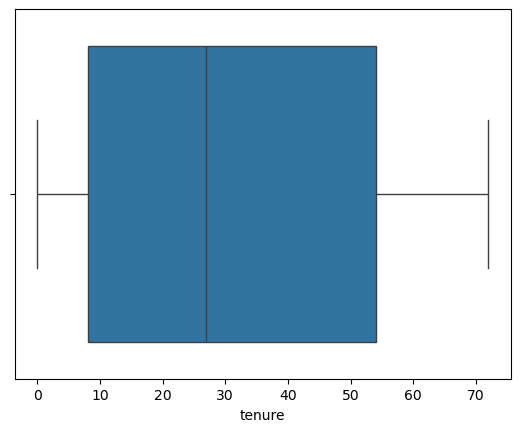

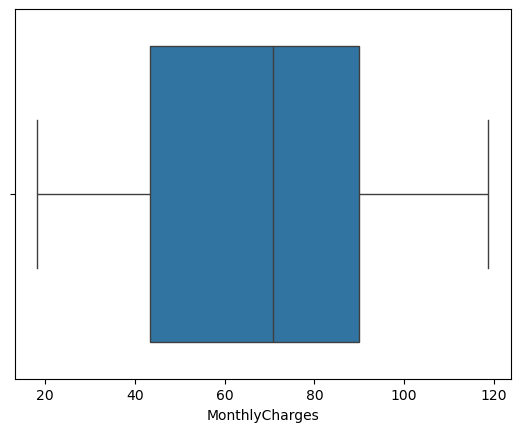

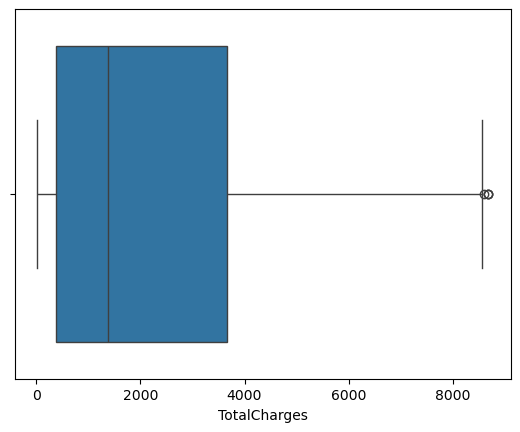

In [87]:
for i in data_knn.columns:
    if data_knn[i].dtypes!=object  and data_knn[i].nunique()>2:
        sns.boxplot(data=data_knn,x=data_knn[i])
        plt.show()

In [88]:
q1=data_knn.quantile(0.25, numeric_only=True)
q3=data_knn.quantile(0.75, numeric_only=True)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

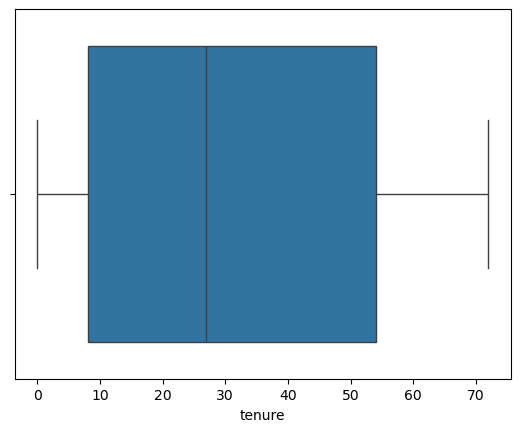

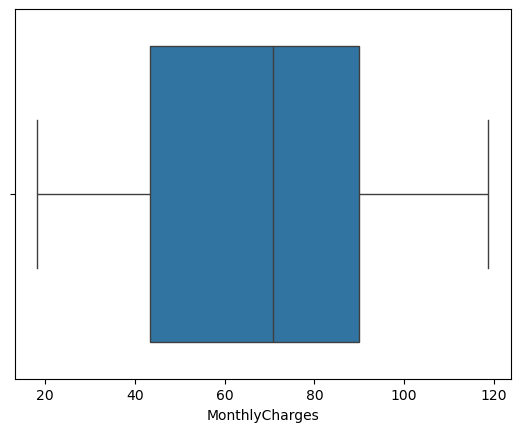

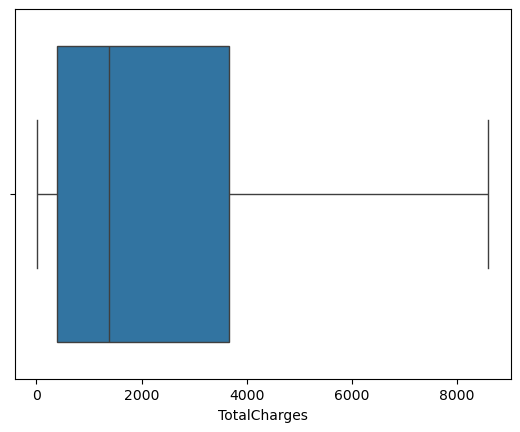

In [89]:
for i in data_knn.columns:
    if data_knn[i].dtypes!=object  and data[i].nunique()>2:
        data_knn[i] = np.where(data_knn[i] > Upper[i],Upper[i],data_knn[i])
        data_knn[i] = np.where(data_knn[i] < Lower[i],Lower[i],data_knn[i])
        sns.boxplot(data=data_knn,x=data_knn[i])
        plt.show()

In [90]:
def target_correlation(data, target, threshold=0.1):
    corr_matrix = data.corr(method='spearman', numeric_only=True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target

target_result = target_correlation(data_knn, 'Churn')

target_result

,Variable,Correlation with Target
0,SeniorCitizen,0.1483
1,tenure,-0.3753
2,MonthlyCharges,0.1859
3,TotalCharges,-0.2438


In [91]:
def intercorrelation(data, target, threshold=0.7):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only=True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    result_intercorrelated_independent = pd.DataFrame({
        'Variable 1': corr_matrix.index[independent_variable_pairs[0]],
        'Variable 2': corr_matrix.columns[independent_variable_pairs[1]]
    })
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(data_knn, 'Churn')

intercorrelated_result

,Variable 1,Variable 2
0,tenure,TotalCharges
1,TotalCharges,tenure


In [92]:
target_result.Variable.tolist()

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(data_knn, [
    'SeniorCitizen', 'tenure', 'MonthlyCharges' ,
    #'TotalCharges'  
])

vif_result


,VIF,Features
0,1.2603,SeniorCitizen
1,2.5617,tenure
2,2.8810,MonthlyCharges


In [94]:
data_knn.drop('TotalCharges', axis=1,inplace=True)


In [95]:
data_knn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,0
1,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,0
2,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,1
3,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,0
4,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,Female,0,Yes,Yes,72.0000,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.4500,0
7791,Male,1,No,No,15.0000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.2000,1
7792,Female,1,No,No,4.0000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.4500,0
7793,Male,1,Yes,No,50.0000,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),105.0500,0


In [96]:
for i in data_knn.columns:
    if data_knn[i].dtypes==object:
        print(data_knn[i].value_counts())

gender
Male      3928
Female    3867
Name: count, dtype: int64
Partner
No     4077
Yes    3718
Name: count, dtype: int64
Dependents
No     5500
Yes    2295
Name: count, dtype: int64
PhoneService
Yes    7030
No      765
Name: count, dtype: int64
MultipleLines
No                  3740
Yes                 3290
No phone service     765
Name: count, dtype: int64
InternetService
Fiber optic    3527
DSL            2742
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     4039
Yes                    2230
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3840
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3563
Yes                    2706
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     4006
Yes                    2263
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     3219
Y

In [97]:

data_knn = pd.get_dummies(data_knn, drop_first=True, dtype=int)

data_knn

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1.0000,29.8500,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34.0000,56.9500,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2.0000,53.8500,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45.0000,42.3000,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2.0000,70.7000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,0,72.0000,110.4500,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0
7791,1,15.0000,74.2000,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
7792,1,4.0000,74.4500,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7793,1,50.0000,105.0500,0,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,1,0,0


In [98]:
data_knn

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1.0000,29.8500,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34.0000,56.9500,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2.0000,53.8500,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45.0000,42.3000,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2.0000,70.7000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,0,72.0000,110.4500,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0
7791,1,15.0000,74.2000,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
7792,1,4.0000,74.4500,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7793,1,50.0000,105.0500,0,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,1,0,0


In [99]:
data_rf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,0
1,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,0
2,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,1
3,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,0
4,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,Female,0,Yes,Yes,72.0000,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.4500,8058.8500,0
7791,Male,1,No,No,15.0000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.2000,1133.9000,1
7792,Female,1,No,No,4.0000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.4500,294.4500,0
7793,Male,1,Yes,No,50.0000,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),105.0500,5163.3000,0


In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data_rf.columns:
    data_rf[i] = le.fit_transform(data_rf[i])
data_rf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,0,0,1,1,72,1,2,1,2,0,2,2,2,2,2,1,0,1477,6463,0
7791,1,1,0,0,15,1,2,1,0,0,0,0,0,0,0,1,1,791,2675,1
7792,0,1,0,0,4,1,2,1,0,0,0,0,0,0,0,1,2,796,1120,0
7793,1,1,1,0,50,1,2,1,2,0,2,0,2,2,2,1,1,1376,5470,0


In [101]:
data_xgb_cb = data_xgb_cb_cbc.copy()
data_cbc = data_xgb_cb_cbc.copy()

In [102]:
data_xgb_cb.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure               86
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup        196
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges         11
Churn                 0
dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data_xgb_cb.columns:
    data_xgb_cb[i] = le.fit_transform(data_xgb_cb[i])
data_xgb_cb

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,0,0,1,1,72,1,2,1,2,0,2,2,2,2,2,1,0,1477,6462,0
7791,1,1,0,0,15,1,2,1,0,0,0,0,0,0,0,1,1,791,2675,1
7792,0,1,0,0,4,1,2,1,0,0,0,0,0,0,0,1,2,796,1120,0
7793,1,1,1,0,50,1,2,1,2,0,2,0,2,2,2,1,1,1376,5469,0


In [104]:
#cbc

In [105]:
data_cbc

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,0
1,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,0
2,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,1
3,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,0
4,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,Female,0,Yes,Yes,72.0000,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.4500,8058.8500,0
7791,Male,1,No,No,15.0000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.2000,1133.9000,1
7792,Female,1,No,No,4.0000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.4500,294.4500,0
7793,Male,1,Yes,No,50.0000,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),105.0500,5163.3000,0


In [106]:
data_cbc.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure               86
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup        196
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges         11
Churn                 0
dtype: int64

In [107]:
for i in data_cbc.columns:
    if data_cbc[i].dtypes==object:
        data_cbc[i].fillna('Missing Value', inplace=True)
        
data_cbc.isnull().sum()

C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\2922291909.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cbc[i].fillna('Missing Value', inplace=True)


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              86
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [108]:
output = data['Churn']


In [109]:
inputs_lr = data_lr[LR_vars]
inputs_knn = data_knn.drop('Churn', axis=1)
inputs_rf = data_rf.drop('Churn', axis=1)
inputs_xgb_cb = data_xgb_cb.drop('Churn', axis=1)
inputs_cbc = data_cbc.drop('Churn', axis=1)

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs_knn)
inputs_scaled = scaler.transform(inputs_knn)

data_scaled_knn = pd.DataFrame(inputs_scaled, columns=inputs_knn.columns)

data_scaled_knn

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.4455,-1.2468,-1.2143,-1.0079,1.0472,-0.6460,-3.0314,3.0314,-0.8546,-0.9091,-0.4934,-0.4934,-0.6330,-0.4934,1.4863,-0.4934,-0.7292,-0.4934,-0.6396,-0.4934,-0.8017,-0.4934,-0.8084,-0.5054,-0.5432,0.8187,-0.5222,1.3667,-0.5341
1,-0.4455,0.1029,-0.2930,0.9922,-0.9550,-0.6460,0.3299,-0.3299,-0.8546,-0.9091,-0.4934,-0.4934,1.5797,-0.4934,-0.6728,-0.4934,1.3714,-0.4934,-0.6396,-0.4934,-0.8017,-0.4934,-0.8084,1.9786,-0.5432,-1.2215,-0.5222,-0.7317,1.8724
2,-0.4455,-1.2059,-0.3984,0.9922,-0.9550,-0.6460,0.3299,-0.3299,-0.8546,-0.9091,-0.4934,-0.4934,1.5797,-0.4934,1.4863,-0.4934,-0.7292,-0.4934,-0.6396,-0.4934,-0.8017,-0.4934,-0.8084,-0.5054,-0.5432,0.8187,-0.5222,-0.7317,1.8724
3,-0.4455,0.5528,-0.7911,0.9922,-0.9550,-0.6460,-3.0314,3.0314,-0.8546,-0.9091,-0.4934,-0.4934,1.5797,-0.4934,-0.6728,-0.4934,1.3714,-0.4934,1.5635,-0.4934,-0.8017,-0.4934,-0.8084,1.9786,-0.5432,-1.2215,-0.5222,-0.7317,-0.5341
4,-0.4455,-1.2059,0.1744,-1.0079,-0.9550,-0.6460,0.3299,-0.3299,-0.8546,1.1000,-0.4934,-0.4934,-0.6330,-0.4934,-0.6728,-0.4934,-0.7292,-0.4934,-0.6396,-0.4934,-0.8017,-0.4934,-0.8084,-0.5054,-0.5432,0.8187,-0.5222,1.3667,-0.5341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,-0.4455,1.6571,1.5257,-1.0079,1.0472,1.5481,0.3299,-0.3299,1.1702,1.1000,-0.4934,-0.4934,1.5797,-0.4934,-0.6728,-0.4934,1.3714,-0.4934,1.5635,-0.4934,1.2473,-0.4934,1.2369,-0.5054,1.8409,0.8187,-0.5222,-0.7317,-0.5341
7791,2.2445,-0.6742,0.2934,0.9922,-0.9550,-0.6460,0.3299,-0.3299,1.1702,1.1000,-0.4934,-0.4934,-0.6330,-0.4934,-0.6728,-0.4934,-0.7292,-0.4934,-0.6396,-0.4934,-0.8017,-0.4934,-0.8084,-0.5054,-0.5432,0.8187,1.9151,-0.7317,-0.5341
7792,2.2445,-1.1241,0.3019,-1.0079,-0.9550,-0.6460,0.3299,-0.3299,1.1702,1.1000,-0.4934,-0.4934,-0.6330,-0.4934,-0.6728,-0.4934,-0.7292,-0.4934,-0.6396,-0.4934,-0.8017,-0.4934,-0.8084,-0.5054,-0.5432,0.8187,-0.5222,1.3667,-0.5341
7793,2.2445,0.7573,1.3421,0.9922,1.0472,-0.6460,0.3299,-0.3299,1.1702,1.1000,-0.4934,-0.4934,1.5797,-0.4934,-0.6728,-0.4934,1.3714,-0.4934,-0.6396,-0.4934,1.2473,-0.4934,1.2369,-0.5054,1.8409,0.8187,1.9151,-0.7317,-0.5341


In [111]:
X_train_lr, X_test_lr, y_train, y_test = train_test_split(inputs_lr, output, test_size=0.2, random_state=42)
X_train_knn, X_test_knn, y_train, y_test = train_test_split(data_scaled_knn, output, test_size=0.2, random_state=42)
X_train_rf, X_test_rf, y_train, y_test = train_test_split(inputs_rf, output, test_size=0.2, random_state=42)
X_train_xgb_cb, X_test_xgb_cb, y_train, y_test = train_test_split(inputs_xgb_cb, output, test_size=0.2, random_state=42)
X_train_cbc, X_test_cbc, y_train, y_test = train_test_split(inputs_cbc, output, test_size=0.2, random_state=42)

In [112]:
from sklearn.metrics import confusion_matrix, classification_report

def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_prob_train = model.predict_proba(X_train)[:, 1]

        roc_prob_train = roc_auc_score(y_train, y_prob_train)
        gini_prob_train = roc_prob_train * 2 - 1
        confusion_matrix_result_train = confusion_matrix(y_train, y_pred_train)
        classification_report_result_train = classification_report(y_train, y_pred_train)

        print(f'Model Performance for {model_name}')
        print('Train Gini prob is', gini_prob_train * 100)
        print(classification_report_result_train)
        print(confusion_matrix_result_train)

        y_pred_test = model.predict(X_test)
        y_prob_test = model.predict_proba(X_test)[:, 1]

        roc_prob_test = roc_auc_score(y_test, y_prob_test)
        gini_prob_test = roc_prob_test * 2 - 1
        confusion_matrix_result_test = confusion_matrix(y_test, y_pred_test)
        classification_report_result_test = classification_report(y_test, y_pred_test)

        print(f'Model Performance for {model_name}')
        print('Test Gini prob is', gini_prob_test * 100)
        print(classification_report_result_test)
        print(confusion_matrix_result_test)

        return [gini_prob_train, gini_prob_test]

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None


In [113]:
for i in data.columns:
    if data[i].dtypes==object:
        print(i)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod


In [114]:
models = []

lr_model = LogisticRegression()
knn_model_def = KNeighborsClassifier()
rf_model_def = RandomForestClassifier(random_state=42)
xgb_model_def = XGBClassifier(random_state=42)
catboost_model_def = CatBoostClassifier(random_state=42)
catboost_model_custom = CatBoostClassifier(cat_features=['gender', 
'Partner', 
'Dependents', 
'PhoneService', 
'MultipleLines', 
'InternetService', 
'OnlineSecurity', 
'OnlineBackup', 
'DeviceProtection', 
'TechSupport', 
'StreamingTV', 
'StreamingMovies', 
'Contract', 
'PaperlessBilling', 
'PaymentMethod'], random_state=42)

models.extend([
    ('LogReg', lr_model),
    ('KNN', knn_model_def),
    ('RF', rf_model_def),
    ('XGBoost', xgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom)
])

In [115]:
gini_df = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models:
    if model_name == 'LogReg':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_lr, y_train, X_test_lr, y_test)
    elif model_name == 'KNN':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_knn, y_train, X_test_knn, y_test)
    elif model_name == 'RF':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_rf, y_train, X_test_rf, y_test)
    elif model_name == 'CatBoost_Custom':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cbc, y_train, X_test_cbc, y_test)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train_xgb_cb, y_train, X_test_xgb_cb, y_test)

    if gini_prob is not None:
        gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted = gini_df.sort_values(by='Test Gini', ascending=False)

gini_df_sorted

Model Performance for LogReg
Train Gini prob is 68.52600779236715
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4496
           1       0.67      0.55      0.60      1740

    accuracy                           0.80      6236
   macro avg       0.75      0.72      0.73      6236
weighted avg       0.79      0.80      0.79      6236

[[4022  474]
 [ 790  950]]
Model Performance for LogReg
Test Gini prob is 68.42915113189281
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1129
           1       0.64      0.55      0.59       430

    accuracy                           0.79      1559
   macro avg       0.74      0.72      0.72      1559
weighted avg       0.78      0.79      0.79      1559

[[996 133]
 [194 236]]


C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\2617709439.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df = pd.concat([gini_df, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


Model Performance for KNN
Train Gini prob is 80.10079201947069
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4496
           1       0.72      0.65      0.68      1740

    accuracy                           0.83      6236
   macro avg       0.79      0.78      0.79      6236
weighted avg       0.83      0.83      0.83      6236

[[4053  443]
 [ 604 1136]]
Model Performance for KNN
Test Gini prob is 56.67023708983048
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1129
           1       0.57      0.53      0.55       430

    accuracy                           0.76      1559
   macro avg       0.70      0.69      0.70      1559
weighted avg       0.76      0.76      0.76      1559

[[957 172]
 [200 230]]
Model Performance for RF
Train Gini prob is 99.99147390272836
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4496


,Model,Train Gini,Test Gini
2,RF,0.9999,0.7327
4,CatBoost,0.8853,0.7140
5,CatBoost_Custom,0.7950,0.7065
3,XGBoost,0.9751,0.6940
0,LogReg,0.6853,0.6843
1,KNN,0.8010,0.5667


In [116]:
gini_df_sorted

,Model,Train Gini,Test Gini
2,RF,0.9999,0.7327
4,CatBoost,0.8853,0.7140
5,CatBoost_Custom,0.7950,0.7065
3,XGBoost,0.9751,0.6940
0,LogReg,0.6853,0.6843
1,KNN,0.8010,0.5667


In [117]:
inputs_lr.columns

Index(['SeniorCitizen_woe', 'Partner_woe', 'Dependents_woe', 'tenure_woe',
       'InternetService_woe', 'OnlineSecurity_woe', 'OnlineBackup_woe',
       'DeviceProtection_woe', 'TechSupport_woe', 'StreamingMovies_woe',
       'Contract_woe', 'PaperlessBilling_woe', 'PaymentMethod_woe'],
      dtype='object')

In [118]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Create lists to store the variables, ROC AUC scores, and Gini scores
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train_lr.columns:
    X_train_single_var = X_train_lr[[i]]
    X_test_single_var = X_test_lr[[i]]

    # Fit a classifier using the single variable on the training set
    lr_model.fit(X_train_single_var, y_train)
    y_pred_train_single_var = lr_model.predict_proba(X_train_single_var)[:, 1]

    # Calculate ROC AUC score for the single variable model on the training set
    train_roc = roc_auc_score(y_train, y_pred_train_single_var)

    # Calculate Gini score for the single variable model on the training set
    train_gini = 2 * train_roc - 1

    # Fit a classifier using the single variable on the test set
    y_pred_test_single_var = lr_model.predict_proba(X_test_single_var)[:, 1]

    # Calculate ROC AUC score for the single variable model on the test set
    test_roc = roc_auc_score(y_test, y_pred_test_single_var)

    # Calculate Gini score for the single variable model on the test set
    test_gini = 2 * test_roc - 1

    # Append the results to the lists
    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

# Create a DataFrame from the results
results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

# Sort the DataFrame by Test Gini score in descending order
results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

# Display the results
pd.options.display.float_format = '{:.4f}'.format
#pd.options.display.float_format = '{:.4%}'.format


results_df_sorted


,Variable,Train Gini,Test Gini
10,Contract_woe,0.4667,0.4784
5,OnlineSecurity_woe,0.4024,0.4227
8,TechSupport_woe,0.3971,0.4176
3,tenure_woe,0.4504,0.4167
4,InternetService_woe,0.3834,0.4138
7,DeviceProtection_woe,0.3256,0.3629
6,OnlineBackup_woe,0.3376,0.3487
12,PaymentMethod_woe,0.3480,0.3228
9,StreamingMovies_woe,0.2155,0.2640
11,PaperlessBilling_woe,0.2039,0.2281


In [119]:
filtered_df = results_df_sorted[
    (results_df_sorted['Test Gini'] > 0.1) &
    (abs(results_df_sorted['Train Gini'] - results_df_sorted['Test Gini']) <= 0.05)
]

filtered_df

,Variable,Train Gini,Test Gini
10,Contract_woe,0.4667,0.4784
5,OnlineSecurity_woe,0.4024,0.4227
8,TechSupport_woe,0.3971,0.4176
3,tenure_woe,0.4504,0.4167
4,InternetService_woe,0.3834,0.4138
7,DeviceProtection_woe,0.3256,0.3629
6,OnlineBackup_woe,0.3376,0.3487
12,PaymentMethod_woe,0.3480,0.3228
9,StreamingMovies_woe,0.2155,0.2640
11,PaperlessBilling_woe,0.2039,0.2281


In [120]:
#hyper

In [121]:
# KNN

from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param = {
    'n_neighbors': trial.suggest_int('n_neighbors', 1, 50), 
    'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),  
    'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),  
    'leaf_size': trial.suggest_int('leaf_size', 10, 100),  
    'p': trial.suggest_int('p', 1, 2),  
    'metric': trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan']) 
}

    knn_clf = KNeighborsClassifier(**param)

    roc = cross_val_score(knn_clf, X_train_knn, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return roc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=50)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_knn_model = KNeighborsClassifier(**best_params)

[I 2025-09-25 15:10:26,567] A new study created in memory with name: no-name-7729ec53-3234-422f-adff-e543fbe66e0a
[I 2025-09-25 15:10:27,859] Trial 0 finished with value: 0.7765041908349989 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 19, 'p': 1, 'metric': 'euclidean'}. Best is trial 0 with value: 0.7765041908349989.
[I 2025-09-25 15:10:28,214] Trial 1 finished with value: 0.8244257820879449 and parameters: {'n_neighbors': 44, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 71, 'p': 2, 'metric': 'minkowski'}. Best is trial 1 with value: 0.8244257820879449.
[I 2025-09-25 15:10:29,032] Trial 2 finished with value: 0.8281151943339911 and parameters: {'n_neighbors': 50, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 81, 'p': 1, 'metric': 'manhattan'}. Best is trial 2 with value: 0.8281151943339911.
[I 2025-09-25 15:10:29,331] Trial 3 finished with value: 0.8007373809696313 and parameters: {'n_neighbors': 8, 'weights': '

Best trial:
  Value: 0.855
  Params:  {'n_neighbors': 50, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 68, 'p': 1, 'metric': 'manhattan'}


In [122]:
# RF

from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param = {
    'n_estimators': trial.suggest_int('n_estimators', 10, 500), 
    'max_features': trial.suggest_categorical('max_features', ['log2', 'sqrt']),  
    'max_depth': trial.suggest_int('max_depth', 10, 50),  
    'min_samples_split': trial.suggest_int('min_samples_split', 10, 200),  
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 50),  
}

    rf_clf = RandomForestClassifier(**param)

    roc = cross_val_score(rf_clf, X_train_rf, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return roc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=50)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestClassifier(**best_params)

[I 2025-09-25 15:11:00,373] A new study created in memory with name: no-name-f5597332-b2a1-42c5-99bd-b833bdd6b3f9
[I 2025-09-25 15:11:07,998] Trial 0 finished with value: 0.8496066418341937 and parameters: {'n_estimators': 234, 'max_features': 'log2', 'max_depth': 12, 'min_samples_split': 95, 'min_samples_leaf': 23}. Best is trial 0 with value: 0.8496066418341937.
[I 2025-09-25 15:11:08,309] Trial 1 finished with value: 0.8463600836462254 and parameters: {'n_estimators': 22, 'max_features': 'log2', 'max_depth': 28, 'min_samples_split': 120, 'min_samples_leaf': 49}. Best is trial 0 with value: 0.8496066418341937.
[I 2025-09-25 15:11:10,453] Trial 2 finished with value: 0.8486137325139186 and parameters: {'n_estimators': 320, 'max_features': 'log2', 'max_depth': 22, 'min_samples_split': 50, 'min_samples_leaf': 42}. Best is trial 0 with value: 0.8496066418341937.
[I 2025-09-25 15:11:12,133] Trial 3 finished with value: 0.8462628235999414 and parameters: {'n_estimators': 247, 'max_features

Best trial:
  Value: 0.855
  Params:  {'n_estimators': 93, 'max_features': 'log2', 'max_depth': 15, 'min_samples_split': 21, 'min_samples_leaf': 6}


In [123]:
# XGBoost

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_int('gamma', 1, 10)
    }

    xgb_clf = XGBClassifier(**param)
    auc = cross_val_score(xgb_clf, X_train_xgb_cb, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBClassifier(**best_params)

[I 2025-09-25 15:14:37,879] A new study created in memory with name: no-name-aee44b18-b11d-404d-a8d9-91f4604c8906
[I 2025-09-25 15:14:39,029] Trial 0 finished with value: 0.8516516094937329 and parameters: {'n_estimators': 316, 'learning_rate': 0.02168901276877144, 'max_depth': 7, 'subsample': 0.5820679767418, 'colsample_bytree': 0.6867598508254498, 'gamma': 5}. Best is trial 0 with value: 0.8516516094937329.
[I 2025-09-25 15:14:40,129] Trial 1 finished with value: 0.8506267574870332 and parameters: {'n_estimators': 342, 'learning_rate': 0.012542400237852368, 'max_depth': 5, 'subsample': 0.8619068579296787, 'colsample_bytree': 0.8224532800062023, 'gamma': 6}. Best is trial 0 with value: 0.8516516094937329.
[I 2025-09-25 15:14:40,563] Trial 2 finished with value: 0.8499006033381777 and parameters: {'n_estimators': 225, 'learning_rate': 0.07972471202732936, 'max_depth': 10, 'subsample': 0.5188229496523782, 'colsample_bytree': 0.5455020668155299, 'gamma': 6}. Best is trial 0 with value: 0

Best trial:
  Value: 0.852
  Params:  {'n_estimators': 409, 'learning_rate': 0.02572566465501812, 'max_depth': 8, 'subsample': 0.7869644809879358, 'colsample_bytree': 0.5145138587437234, 'gamma': 5}


In [124]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), 
        # 'cat_features': [],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss'])
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train_xgb_cb, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)

[I 2025-09-25 15:14:46,777] A new study created in memory with name: no-name-5e17bdd7-b43a-4bc3-8e77-473106d7bac5
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\1567532519.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\1567532519.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2025-09-25 15:14:53,952] Trial 0 finished with value: 0.8467666206620548 and parameters: {'iterations': 750, 'learning_rate': 0.040861822993578295, 'depth': 4, 'l2_leaf_reg': 0.6574844088238642, 

Best trial:
  Value: 0.847
  Params:  {'iterations': 750, 'learning_rate': 0.040861822993578295, 'depth': 4, 'l2_leaf_reg': 0.6574844088238642, 'loss_function': 'Logloss'}


In [125]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), 
         'cat_features': ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'], 
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss'])
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train_cbc, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model_ch = CatBoostClassifier(**best_params)

[I 2025-09-25 15:14:53,965] A new study created in memory with name: no-name-51507518-2b64-44d0-bdf9-9b1a8f947d75
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\4124510146.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\4124510146.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2025-09-25 15:16:53,855] Trial 0 finished with value: 0.8489551221564904 and parameters: {'iterations': 713, 'learning_rate': 0.04042844293462946, 'depth': 8, 'l2_leaf_reg': 7.7131291441150545, '

Best trial:
  Value: 0.849
  Params:  {'iterations': 713, 'learning_rate': 0.04042844293462946, 'depth': 8, 'l2_leaf_reg': 7.7131291441150545, 'loss_function': 'Logloss'}


In [126]:
models_optimized = []

models_optimized.extend([
    ('KNN Optuna', best_knn_model),
    ('RF Optuna', best_rf_model),
    ('XGBoost Optuna', best_xgb_model),
    ('CatBoost Optuna', best_cb_model),
    ('CatBoost Optuna Custom', best_cb_model_ch)
])

In [127]:
gini_df_optuna = pd.DataFrame(columns=['Model', 'Train Gini', 'Test Gini'])

for model_name, model in models_optimized:
    if model_name == 'KNN Optuna':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_knn, y_train, X_test_knn, y_test)
    elif model_name == 'CatBoost_Custom':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_cbc, y_train, X_test_cbc, y_test)
    elif model_name == 'RF Optuna':
        gini_prob = train_and_evaluate_model(model_name, model, X_train_rf, y_train, X_test_rf, y_test)
    else:
        gini_prob = train_and_evaluate_model(model_name, model, X_train_xgb_cb, y_train, X_test_xgb_cb, y_test)

    if gini_prob is not None:
        gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)

gini_df_sorted_optuna = gini_df_optuna.sort_values(by='Test Gini', ascending=False)

gini_df_sorted_optuna


Model Performance for KNN Optuna
Train Gini prob is 99.99777580071176
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4496
           1       1.00      0.99      1.00      1740

    accuracy                           1.00      6236
   macro avg       1.00      1.00      1.00      6236
weighted avg       1.00      1.00      1.00      6236

[[4495    1]
 [  12 1728]]
Model Performance for KNN Optuna
Test Gini prob is 73.88489505015758
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1129
           1       0.65      0.62      0.64       430

    accuracy                           0.80      1559
   macro avg       0.75      0.75      0.75      1559
weighted avg       0.80      0.80      0.80      1559

[[983 146]
 [162 268]]


C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\3740413936.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gini_df_optuna = pd.concat([gini_df_optuna, pd.DataFrame({'Model': [model_name], 'Train Gini': [gini_prob[0]], 'Test Gini': [gini_prob[1]]})], ignore_index=True)


Model Performance for RF Optuna
Train Gini prob is 85.02490080582483
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4496
           1       0.80      0.63      0.71      1740

    accuracy                           0.85      6236
   macro avg       0.83      0.79      0.80      6236
weighted avg       0.85      0.85      0.85      6236

[[4220  276]
 [ 637 1103]]
Model Performance for RF Optuna
Test Gini prob is 70.39755288689314
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1129
           1       0.71      0.55      0.62       430

    accuracy                           0.81      1559
   macro avg       0.78      0.73      0.75      1559
weighted avg       0.81      0.81      0.81      1559

[[1032   97]
 [ 192  238]]
Model Performance for XGBoost Optuna
Train Gini prob is 74.83960199615494
              precision    recall  f1-score   support

           0       0.85   

,Model,Train Gini,Test Gini
0,KNN Optuna,1.0000,0.7388
4,CatBoost Optuna Custom,0.9641,0.7158
3,CatBoost Optuna,0.8270,0.7076
1,RF Optuna,0.8502,0.7040
2,XGBoost Optuna,0.7484,0.7003


In [128]:
gini_df_sorted_optuna


,Model,Train Gini,Test Gini
0,KNN Optuna,1.0000,0.7388
4,CatBoost Optuna Custom,0.9641,0.7158
3,CatBoost Optuna,0.8270,0.7076
1,RF Optuna,0.8502,0.7040
2,XGBoost Optuna,0.7484,0.7003


In [129]:
final_review = pd.concat([gini_df_sorted,gini_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='Test Gini', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted['Gini_gap'] = (final_review_sorted['Train Gini'] - final_review_sorted['Test Gini']).abs()

final_review_sorted = final_review_sorted.sort_values(
    by=['Test Gini', 'Gini_gap'],
    ascending=[False, True]
).reset_index(drop=True)

final_review_sorted

,Model,Train Gini,Test Gini,Gini_gap
0,KNN Optuna,1.0000,0.7388,0.2611
1,RF,0.9999,0.7327,0.2672
2,CatBoost Optuna Custom,0.9641,0.7158,0.2484
3,CatBoost,0.8853,0.7140,0.1713
4,CatBoost Optuna,0.8270,0.7076,0.1195
5,CatBoost_Custom,0.7950,0.7065,0.0885
6,RF Optuna,0.8502,0.7040,0.1463
7,XGBoost Optuna,0.7484,0.7003,0.0481
8,XGBoost,0.9751,0.6940,0.2810
9,LogReg,0.6853,0.6843,0.0010


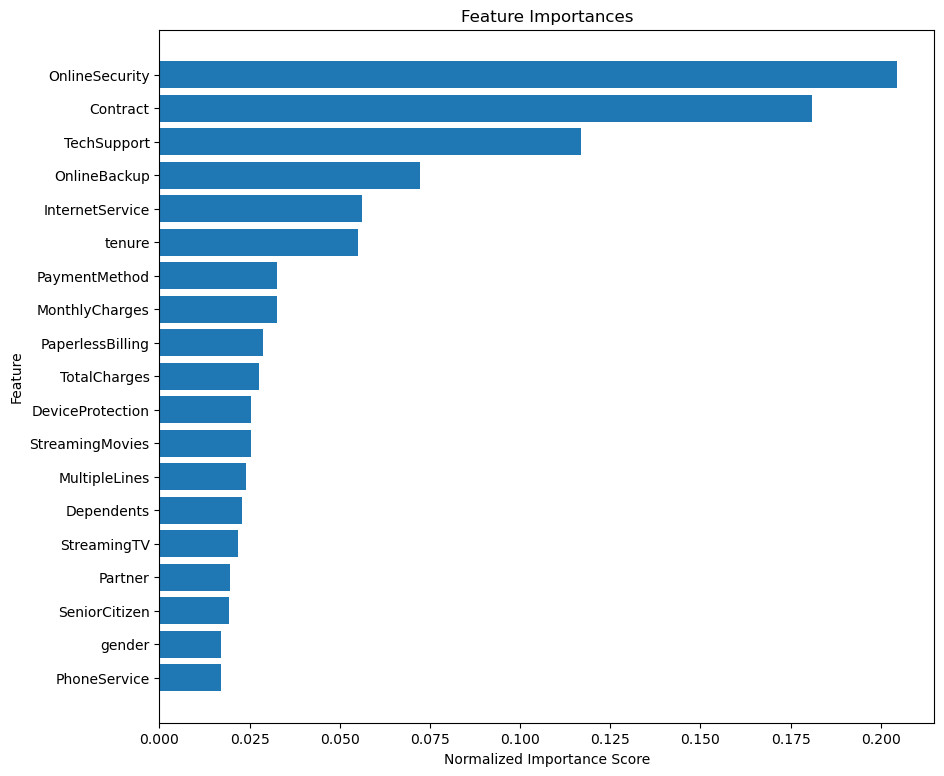

In [130]:
import matplotlib.pyplot as plt

importances = best_xgb_model.feature_importances_


importances = importances / importances.sum()

importance_df = pd.DataFrame({
        'Feature':  X_train_xgb_cb.columns,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 9))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances")
plt.xlabel("Normalized Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

In [131]:
importance_df

,Feature,Importance
8,OnlineSecurity,0.2046
14,Contract,0.1811
11,TechSupport,0.1170
9,OnlineBackup,0.0723
7,InternetService,0.0563
4,tenure,0.0549
16,PaymentMethod,0.0327
17,MonthlyCharges,0.0326
15,PaperlessBilling,0.0287
18,TotalCharges,0.0275


In [132]:

important_features_df = importance_df[importance_df['Importance'] > 0.01]

print("Features with Importance > 1%:")
important_features_df

Features with Importance > 1%:


,Feature,Importance
8,OnlineSecurity,0.2046
14,Contract,0.1811
11,TechSupport,0.1170
9,OnlineBackup,0.0723
7,InternetService,0.0563
4,tenure,0.0549
16,PaymentMethod,0.0327
17,MonthlyCharges,0.0326
15,PaperlessBilling,0.0287
18,TotalCharges,0.0275


In [133]:
important_features_df.Feature.tolist()

['OnlineSecurity',
 'Contract',
 'TechSupport',
 'OnlineBackup',
 'InternetService',
 'tenure',
 'PaymentMethod',
 'MonthlyCharges',
 'PaperlessBilling',
 'TotalCharges',
 'DeviceProtection',
 'StreamingMovies',
 'MultipleLines',
 'Dependents',
 'StreamingTV',
 'Partner',
 'SeniorCitizen',
 'gender',
 'PhoneService']

In [134]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


SHAP Values Summary (Selected Features)


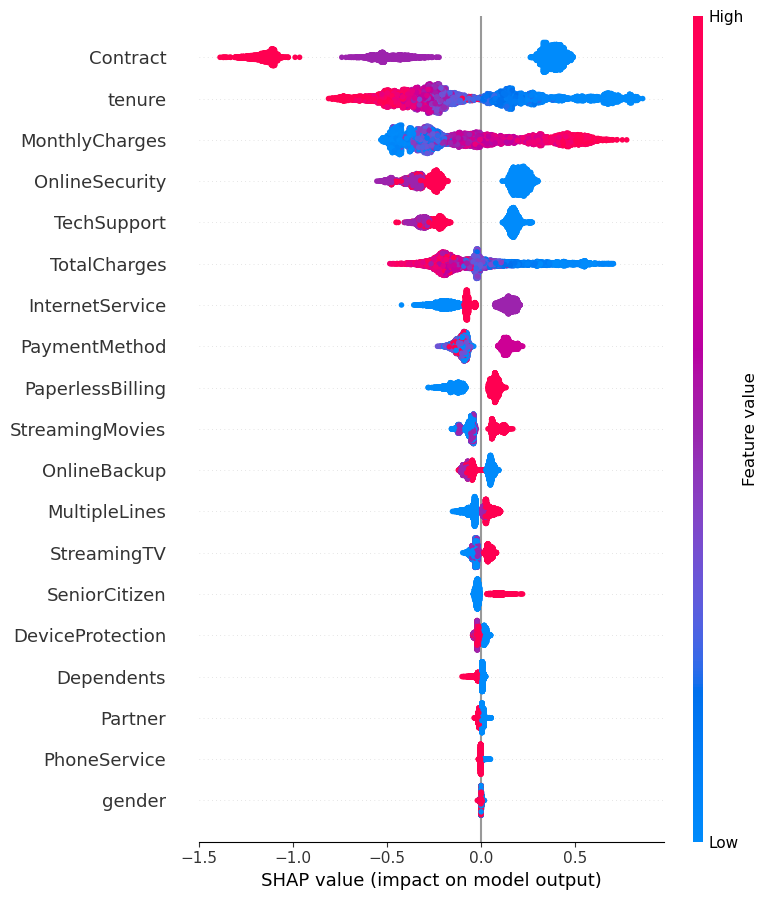

In [135]:
import shap

selected_features = [
    'OnlineSecurity',
 'Contract',
 'TechSupport',
 'OnlineBackup',
 'InternetService',
 'tenure',
 'PaymentMethod',
 'MonthlyCharges',
 'PaperlessBilling',
 'TotalCharges',
 'DeviceProtection',
 'StreamingMovies',
 'MultipleLines',
 'Dependents',
 'StreamingTV',
 'Partner',
 'SeniorCitizen',
 'gender',
 'PhoneService'
]


explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_train_xgb_cb)


shap_df = pd.DataFrame(shap_values, columns=X_train_xgb_cb.columns)
shap_selected = shap_df[selected_features]
X_selected = X_train_xgb_cb[selected_features]


print("SHAP Values Summary (Selected Features)")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_selected.values, X_selected, show=False)
plt.tight_layout()
plt.show()

In [140]:

new_inputs_xgb_cb = data_xgb_cb.drop(['Partner', 'gender', 'PhoneService', 'DeviceProtection','Churn'], axis=1)



In [141]:
X_train_xgb_cb, X_test_xgb_cb, y_train, y_test = train_test_split(new_inputs_xgb_cb, output, test_size=0.2, random_state=42)

In [142]:
# XGBoost

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_int('gamma', 1, 10)
    }

    xgb_clf = XGBClassifier(**param)
    auc = cross_val_score(xgb_clf, X_train_xgb_cb, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model_fin = XGBClassifier(**best_params)

[I 2025-09-25 16:35:52,298] A new study created in memory with name: no-name-dab0a434-0970-42e6-aee5-9f152ab3f6d2
[I 2025-09-25 16:35:52,909] Trial 0 finished with value: 0.840952686183172 and parameters: {'n_estimators': 426, 'learning_rate': 0.14163894232807597, 'max_depth': 10, 'subsample': 0.6153817212448351, 'colsample_bytree': 0.7970290831084759, 'gamma': 1}. Best is trial 0 with value: 0.840952686183172.
[I 2025-09-25 16:35:53,390] Trial 1 finished with value: 0.8512979673029631 and parameters: {'n_estimators': 352, 'learning_rate': 0.018981327691454518, 'max_depth': 5, 'subsample': 0.6392764788765644, 'colsample_bytree': 0.6165291294103292, 'gamma': 5}. Best is trial 1 with value: 0.8512979673029631.
[I 2025-09-25 16:35:53,815] Trial 2 finished with value: 0.8371611706351743 and parameters: {'n_estimators': 497, 'learning_rate': 0.8908658522064521, 'max_depth': 7, 'subsample': 0.5243735937690301, 'colsample_bytree': 0.696243450824531, 'gamma': 9}. Best is trial 1 with value: 0.

Best trial:
  Value: 0.852
  Params:  {'n_estimators': 238, 'learning_rate': 0.07688812953905848, 'max_depth': 9, 'subsample': 0.6819289190396378, 'colsample_bytree': 0.8615068094477908, 'gamma': 4}


In [143]:
train_and_evaluate_model('XGB opitimized for selected features', best_xgb_model, X_train_xgb_cb, y_train, X_test_xgb_cb, y_test)

Model Performance for XGB opitimized for selected features
Train Gini prob is 74.35891929480101
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4496
           1       0.71      0.58      0.64      1740

    accuracy                           0.82      6236
   macro avg       0.78      0.74      0.76      6236
weighted avg       0.81      0.82      0.81      6236

[[4084  412]
 [ 735 1005]]
Model Performance for XGB opitimized for selected features
Test Gini prob is 69.96209858487651
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1129
           1       0.66      0.53      0.59       430

    accuracy                           0.79      1559
   macro avg       0.74      0.71      0.72      1559
weighted avg       0.78      0.79      0.79      1559

[[1009  120]
 [ 202  228]]


[np.float64(0.7435891929480101), np.float64(0.6996209858487652)]

In [ ]:
#Voting

In [144]:
from sklearn.ensemble import VotingClassifier

In [145]:
inputs_vot = data_knn.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs_vot, output, test_size=0.2, random_state=42)

In [146]:
lr_model_vot = LogisticRegression()

In [147]:
# RF

from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):
    param = {
    'n_estimators': trial.suggest_int('n_estimators', 10, 500), 
    'max_features': trial.suggest_categorical('max_features', ['log2', 'sqrt']),  
    'max_depth': trial.suggest_int('max_depth', 10, 50),  
    'min_samples_split': trial.suggest_int('min_samples_split', 10, 200),  
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 50),  
}

    rf_clf = RandomForestClassifier(**param)

    roc = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return roc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=50)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model_vot = RandomForestClassifier(**best_params)

[I 2025-09-25 16:36:16,298] A new study created in memory with name: no-name-e7daf191-7b7b-4d93-8b26-a508da2ff8eb
[I 2025-09-25 16:36:18,777] Trial 0 finished with value: 0.8506333488181135 and parameters: {'n_estimators': 330, 'max_features': 'log2', 'max_depth': 16, 'min_samples_split': 34, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8506333488181135.
[I 2025-09-25 16:36:21,488] Trial 1 finished with value: 0.8472906010225637 and parameters: {'n_estimators': 414, 'max_features': 'sqrt', 'max_depth': 22, 'min_samples_split': 128, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.8506333488181135.
[I 2025-09-25 16:36:22,486] Trial 2 finished with value: 0.8461164753799097 and parameters: {'n_estimators': 163, 'max_features': 'sqrt', 'max_depth': 21, 'min_samples_split': 132, 'min_samples_leaf': 26}. Best is trial 0 with value: 0.8506333488181135.
[I 2025-09-25 16:36:23,086] Trial 3 finished with value: 0.8429865847109814 and parameters: {'n_estimators': 95, 'max_features

Best trial:
  Value: 0.854
  Params:  {'n_estimators': 338, 'max_features': 'log2', 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 5}


In [148]:
# Catboost 

def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), 
         #'cat_features': [],
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss'])
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train, y_train, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model_vot = CatBoostClassifier(**best_params)

[I 2025-09-25 16:38:02,276] A new study created in memory with name: no-name-0ea38766-8bbe-4e32-9356-0b3be10565f1
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\3396431457.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Nurane2\AppData\Local\Temp\ipykernel_18256\3396431457.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2025-09-25 16:38:22,717] Trial 0 finished with value: 0.8499948190168408 and parameters: {'iterations': 834, 'learning_rate': 0.017063297209468437, 'depth': 9, 'l2_leaf_reg': 2.4864475281312943, 

Best trial:
  Value: 0.850
  Params:  {'iterations': 834, 'learning_rate': 0.017063297209468437, 'depth': 9, 'l2_leaf_reg': 2.4864475281312943, 'loss_function': 'Logloss'}


In [149]:
# XGBoost

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_int('gamma', 1, 10)
    }

    xgb_clf = XGBClassifier(**param)
    auc = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model_vot = XGBClassifier(**best_params)

[I 2025-09-25 16:38:22,726] A new study created in memory with name: no-name-ae6f846e-50ec-4a96-856f-c8caed81435d
[I 2025-09-25 16:38:23,267] Trial 0 finished with value: 0.8510750965667828 and parameters: {'n_estimators': 388, 'learning_rate': 0.03665566522639544, 'max_depth': 10, 'subsample': 0.7296247412916097, 'colsample_bytree': 0.5546776706121757, 'gamma': 5}. Best is trial 0 with value: 0.8510750965667828.
[I 2025-09-25 16:38:23,786] Trial 1 finished with value: 0.8528923065503461 and parameters: {'n_estimators': 262, 'learning_rate': 0.06398373150429298, 'max_depth': 10, 'subsample': 0.9926144428849719, 'colsample_bytree': 0.6266849185319177, 'gamma': 2}. Best is trial 1 with value: 0.8528923065503461.
[I 2025-09-25 16:38:24,347] Trial 2 finished with value: 0.8495640256592752 and parameters: {'n_estimators': 428, 'learning_rate': 0.23822683713189713, 'max_depth': 9, 'subsample': 0.8289904658784506, 'colsample_bytree': 0.9538791574253862, 'gamma': 10}. Best is trial 1 with valu

Best trial:
  Value: 0.853
  Params:  {'n_estimators': 262, 'learning_rate': 0.06398373150429298, 'max_depth': 10, 'subsample': 0.9926144428849719, 'colsample_bytree': 0.6266849185319177, 'gamma': 2}


In [153]:
voting_clf_hard = VotingClassifier(
    estimators=[
        ('lr', lr_model_vot),
        ('rf', best_rf_model_vot),
        ('xgb', best_xgb_model_vot),
        ('cat', best_cb_model_vot)
    ],
    voting='hard' 
)

In [154]:
from sklearn.metrics import classification_report

def train_and_evaluate_model_voting_hard(model_name, model, X_train, y_train, X_test, y_test):
    try:
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Classification reports as dicts
        train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
        test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

        # Convert to DataFrames
        train_report_df = pd.DataFrame(train_report_dict).transpose()
        test_report_df = pd.DataFrame(test_report_dict).transpose()

        # Add model info
        train_report_df["Dataset"] = "Train"
        train_report_df["Model"] = model_name

        test_report_df["Dataset"] = "Test"
        test_report_df["Model"] = model_name

        # Combine into one dataframe
        final_df = pd.concat([train_report_df, test_report_df], axis=0)

        return final_df

    except Exception as e:
        print(f"An error occurred while evaluating the model {model_name}: {e}")
        return None


In [155]:
train_and_evaluate_model_voting_hard('Voting model', voting_clf_hard, X_train, y_train, X_test, y_test)


Training Voting model...


C:\Users\Nurane2\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 0.6815528	total: 10.4ms	remaining: 8.69s
1:	learn: 0.6702304	total: 22ms	remaining: 9.14s
2:	learn: 0.6601550	total: 28.9ms	remaining: 8.01s
3:	learn: 0.6496650	total: 40.2ms	remaining: 8.35s
4:	learn: 0.6394266	total: 51.1ms	remaining: 8.48s
5:	learn: 0.6302902	total: 62.7ms	remaining: 8.66s
6:	learn: 0.6219268	total: 69.3ms	remaining: 8.19s
7:	learn: 0.6131465	total: 80.9ms	remaining: 8.35s
8:	learn: 0.6042891	total: 93.5ms	remaining: 8.57s
9:	learn: 0.5967022	total: 102ms	remaining: 8.39s
10:	learn: 0.5890394	total: 113ms	remaining: 8.49s
11:	learn: 0.5822395	total: 126ms	remaining: 8.65s
12:	learn: 0.5750332	total: 138ms	remaining: 8.74s
13:	learn: 0.5685855	total: 150ms	remaining: 8.81s
14:	learn: 0.5624841	total: 157ms	remaining: 8.56s
15:	learn: 0.5563941	total: 169ms	remaining: 8.63s
16:	learn: 0.5503780	total: 183ms	remaining: 8.8s
17:	learn: 0.5456309	total: 191ms	remaining: 8.67s
18:	learn: 0.5399283	total: 199ms	remaining: 8.54s
19:	learn: 0.5342500	total: 216ms	r

,precision,recall,f1-score,support,Dataset,Model
0,0.8669,0.9457,0.9046,4496.0000,Train,Voting model
1,0.8167,0.6247,0.7079,1740.0000,Train,Voting model
accuracy,0.8562,0.8562,0.8562,0.8562,Train,Voting model
macro avg,0.8418,0.7852,0.8062,6236.0000,Train,Voting model
weighted avg,0.8529,0.8562,0.8497,6236.0000,Train,Voting model
0,0.8362,0.9176,0.8750,1129.0000,Test,Voting model
1,0.7094,0.5279,0.6053,430.0000,Test,Voting model
accuracy,0.8101,0.8101,0.8101,0.8101,Test,Voting model
macro avg,0.7728,0.7228,0.7402,1559.0000,Test,Voting model
weighted avg,0.8012,0.8101,0.8006,1559.0000,Test,Voting model


In [156]:
voting_clf_soft = VotingClassifier(
    estimators=[
        ('lr', lr_model_vot),
        ('rf', best_rf_model_vot),
        ('xgb', best_xgb_model_vot),
        ('cat', best_cb_model_vot)
    ],
    voting='soft' 
)

train_and_evaluate_model('Voting model', voting_clf_soft, X_train, y_train, X_test, y_test)

C:\Users\Nurane2\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 0.6815528	total: 25ms	remaining: 20.8s
1:	learn: 0.6702304	total: 41.1ms	remaining: 17.1s
2:	learn: 0.6601550	total: 48.3ms	remaining: 13.4s
3:	learn: 0.6496650	total: 59.5ms	remaining: 12.3s
4:	learn: 0.6394266	total: 77.2ms	remaining: 12.8s
5:	learn: 0.6302902	total: 98.4ms	remaining: 13.6s
6:	learn: 0.6219268	total: 110ms	remaining: 13s
7:	learn: 0.6131465	total: 127ms	remaining: 13.1s
8:	learn: 0.6042891	total: 160ms	remaining: 14.7s
9:	learn: 0.5967022	total: 202ms	remaining: 16.6s
10:	learn: 0.5890394	total: 227ms	remaining: 17s
11:	learn: 0.5822395	total: 244ms	remaining: 16.7s
12:	learn: 0.5750332	total: 264ms	remaining: 16.7s
13:	learn: 0.5685855	total: 280ms	remaining: 16.4s
14:	learn: 0.5624841	total: 288ms	remaining: 15.7s
15:	learn: 0.5563941	total: 308ms	remaining: 15.7s
16:	learn: 0.5503780	total: 354ms	remaining: 17s
17:	learn: 0.5456309	total: 369ms	remaining: 16.7s
18:	learn: 0.5399283	total: 395ms	remaining: 16.9s
19:	learn: 0.5342500	total: 421ms	remaining

[np.float64(0.8737820591483618), np.float64(0.7182091581354153)]

In [157]:
from sklearn.ensemble import StackingClassifier

In [158]:
estimators = [
    ('rf', best_rf_model_vot),
    ('xgb', best_xgb_model_vot),
    ('cat', best_cb_model_vot)
]

estimators

[('rf',
  RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=5,
                         min_samples_split=10, n_estimators=338)),
 ('xgb',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.6266849185319177, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=2, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.06398373150429298,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=262, n_jobs=None,
                num_parallel_tree=None, ...)),
 ('cat', <ca

In [159]:
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=lr_model_vot,
    passthrough=True,   
    cv=5,                
    stack_method='predict_proba'  # ensures probabilities are passed
)

stack_clf

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=40,
                                                       max_features='log2',
                                                       min_samples_leaf=5,
                                                       min_samples_split=10,
                                                       n_estimators=338)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.6266849185319177,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_c...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=10,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=262, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x000002E55AA21910>)],
                   final_estimator=LogisticRegression(), passthrough=True,
                   stack_method='predict_proba')

In [160]:
train_and_evaluate_model('Stacking model', stack_clf, X_train, y_train, X_test, y_test)

0:	learn: 0.6815528	total: 10.6ms	remaining: 8.84s
1:	learn: 0.6702304	total: 22ms	remaining: 9.13s
2:	learn: 0.6601550	total: 28.4ms	remaining: 7.86s
3:	learn: 0.6496650	total: 35.5ms	remaining: 7.37s
4:	learn: 0.6394266	total: 46.3ms	remaining: 7.67s
5:	learn: 0.6302902	total: 58.3ms	remaining: 8.04s
6:	learn: 0.6219268	total: 65ms	remaining: 7.68s
7:	learn: 0.6131465	total: 76.5ms	remaining: 7.9s
8:	learn: 0.6042891	total: 88.9ms	remaining: 8.14s
9:	learn: 0.5967022	total: 97ms	remaining: 7.99s
10:	learn: 0.5890394	total: 116ms	remaining: 8.67s
11:	learn: 0.5822395	total: 127ms	remaining: 8.7s
12:	learn: 0.5750332	total: 138ms	remaining: 8.7s
13:	learn: 0.5685855	total: 149ms	remaining: 8.75s
14:	learn: 0.5624841	total: 155ms	remaining: 8.49s
15:	learn: 0.5563941	total: 165ms	remaining: 8.46s
16:	learn: 0.5503780	total: 184ms	remaining: 8.82s
17:	learn: 0.5456309	total: 197ms	remaining: 8.92s
18:	learn: 0.5399283	total: 209ms	remaining: 8.97s
19:	learn: 0.5342500	total: 220ms	remain

C:\Users\Nurane2\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance for Stacking model
Train Gini prob is 87.71058309813064
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4496
           1       0.83      0.71      0.77      1740

    accuracy                           0.88      6236
   macro avg       0.86      0.83      0.84      6236
weighted avg       0.88      0.88      0.88      6236

[[4240  256]
 [ 500 1240]]
Model Performance for Stacking model
Test Gini prob is 72.1175355840732
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1129
           1       0.69      0.57      0.63       430

    accuracy                           0.81      1559
   macro avg       0.77      0.74      0.75      1559
weighted avg       0.80      0.81      0.81      1559

[[1018  111]
 [ 183  247]]


[np.float64(0.8771058309813065), np.float64(0.7211753558407319)]